# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Alex| secret |
|Jesse| secret|
|Joran| secret |
|Toon| secret |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

# De tutorial

# Introductie

Rdflib is een pythonmodule die veel gebruikt wordt bij het maken, inlezen van, werken met en het bewerken van RDF type data. In deze tutorial richten we ons vooral op het omzetten van een networkx database naar een rdflib database en hoe je zoekopdrachten uit kunt voeren op deze database. Om te beginnen importeren we de nodige modules. 

Tip! kijk voor extra informatie over rdflib op https://rdflib.readthedocs.io/en/stable/gettingstarted.html

### Module importeren

In [2]:
#!pip install rdflib
from rdflib import  Graph, Namespace
from rdflib.namespace import RDF

#!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Als je de rdflib module of de networkx module nog niet geïnstalleerd hebt kun je dit doen door de hekjes te verwijderen en deze te runnen.

Nu we de modules geïmporteerd hebben kunnen we beginnen! Laten we allereerst onze networkx database bekijken.

### Networkx graph opzetten
#### Een nieuwe graph maken

In [3]:
H = nx.DiGraph()

#### Networkx graph opzetten

In [4]:
def ouders(x,y,network = H):
    network.add_edge(x,y, ouder = True)

# Namen van de nodes instellen
Mannen = {'Piet Slager', 'Kees van Mansom (Senior)','Kees van Mansom (Junior)', 'Sven van Mansom', 
          'Theo Streng', 'Jan Verweij', 'Sven Verweij', 'Derek Verweij', 'Roel Verweij', 'Joran Verweij', 'Max Verweij', 'Gosse Verweij', 'Hielke Verweij', 'Tsjerk Verweij', 'Bouke Verweij',
          'Jeroen de Vries', 'Hans de Vries', 'Herman de Vries', 'Gerard Draaijer', 'Bas Brouwer', 'Aart Brouwer','Ferdinand van der Blaak', 'Rogier van der Blaak', 'Jan Prins', 
          'Ronald van der Blaak', 'Ryan van Mansom',
         'Alex Zwijnenburg', 'Daniël Zwijnenburg', 'Fred Zwijnenburg','Simon Ooms',"Jan Zwijnenburg","Rob Labordus"}
Vrouwen = {'Alice Slager', 'Joke van den Beukel', 'Rietje Berkelaar', 
           'Christine Streng', 'Nelleke Verweij', 'Edith Streng', 'Liesbeth Verweij', 
           'Agaath de Vries', 'Jo Draaijer', 'Marthy de Vries-Beekman', 'Margaretha Draaijer-Meeuwsse', 'Fredy Prins-de Vries', 'Ada van der Blaak-de Vries', 'Anneloes Prins',
           'Meike Prins',
           'Sylvia Labordus', 'Anneke Ooms', 'Simone Ooms',"Adriana Tielemans","Loes Labordus", 'Daphne van Mansom'}

# Gender attribute instellen
H.add_nodes_from(Mannen, M=True, V=False)
H.add_nodes_from(Vrouwen, M=False, V=True)

# Instellen rang 1 familie
ouders('Kees van Mansom (Junior)','Sven van Mansom')
ouders('Alice Slager','Sven van Mansom')

ouders('Rietje Berkelaar','Kees van Mansom (Junior)')
ouders('Kees van Mansom (Senior)','Kees van Mansom (Junior)')

ouders('Kees van Mansom (Junior)','Daphne van Mansom')
ouders('Alice Slager','Daphne van Mansom')

ouders('Kees van Mansom (Junior)','Ryan van Mansom')
ouders('Alice Slager','Ryan van Mansom')

ouders('Piet Slager','Alice Slager')
ouders('Joke van den Beukel','Alice Slager')

ouders('Sven Verweij', 'Joran Verweij')
ouders('Edith Streng', 'Joran Verweij')

ouders('Sven Verweij', 'Max Verweij')
ouders('Edith Streng', 'Max Verweij')

ouders('Jan Verweij', 'Sven Verweij')
ouders('Nelleke Verweij', 'Sven Verweij')

ouders('Christine Streng', 'Edith Streng')
ouders('Theo Streng', 'Edith Streng')

ouders('Jan Verweij', 'Roel Verweij')
ouders('Nelleke Verweij', 'Roel Verweij')

ouders('Jan Verweij', 'Derek Verweij')
ouders('Nelleke Verweij', 'Derek Verweij')

ouders('Roel Verweij', 'Gosse Verweij')
ouders('Liesbeth Verweij', 'Gosse Verweij')

ouders('Roel Verweij', 'Hielke Verweij')
ouders('Liesbeth Verweij', 'Hielke Verweij')

ouders('Roel Verweij', 'Tsjerk Verweij')
ouders('Liesbeth Verweij', 'Tsjerk Verweij')

ouders('Roel Verweij', 'Bouke Verweij')
ouders('Liesbeth Verweij', 'Bouke Verweij')

ouders('Agaath de Vries', 'Aart Brouwer')
ouders('Bas Brouwer','Aart Brouwer')

ouders('Hans de Vries', 'Agaath de Vries')
ouders('Jo Draaijer', 'Agaath de Vries')

ouders('Hans de Vries', 'Jeroen de Vries')
ouders('Jo Draaijer', 'Jeroen de Vries')

ouders('Herman de Vries', 'Hans de Vries')
ouders('Marthy de Vries-Beekman', 'Hans de Vries')

ouders('Gerard Draaijer', 'Jo Draaijer')
ouders('Margaretha Draaijer-Meeuwsse', 'Jo Draaijer')

ouders('Herman de Vries', 'Ada van der Blaak-de Vries')
ouders('Marthy de Vries-Beekman', 'Ada van der Blaak-de Vries')

ouders('Herman de Vries', 'Fredy Prins-de Vries')
ouders('Marthy de Vries-Beekman', 'Fredy Prins-de Vries')

ouders('Herman de Vries', 'Ada van der Blaak-de Vries')
ouders('Marthy de Vries-Beekman', 'Ada van der Blaak-de Vries')

ouders('Ada van der Blaak-de Vries', 'Rogier van der Blaak' )
ouders('Ronald van der Blaak', 'Rogier van der Blaak')

ouders('Ada van der Blaak-de Vries', 'Ferdinand van der Blaak')
ouders('Ronald van der Blaak', 'Ferdinand van der Blaak')

ouders('Fredy Prins-de Vries', 'Anneloes Prins')
ouders('Jan Prins', 'Anneloes Prins')

ouders('Fredy Prins-de Vries', 'Meike Prins')
ouders('Jan Prins', 'Meike Prins')

ouders("Jan Zwijnenburg", "Fred Zwijnenburg")
ouders("Adriana Tielemans", "Fred Zwijnenburg")

ouders("Fred Zwijnenburg", "Alex Zwijnenburg")
ouders("Sylvia Labordus", "Alex Zwijnenburg")

ouders("Fred Zwijnenburg", "Daniël Zwijnenburg")
ouders("Sylvia Labordus", "Daniël Zwijnenburg")

ouders("Jan Zwijnenburg", "Anneke Ooms")
ouders("Adriana Tielemans", "Anneke Ooms")

ouders("Rob Labordus", "Sylvia Labordus")
ouders("Loes Labordus", "Sylvia Labordus")

ouders("Simon Ooms","Simone Ooms")
ouders("Anneke Ooms","Simone Ooms")

De Graph is ingesteld! Laten we even kijken hoe deze eruit ziet.

C:\Users\Joran\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Joran\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<Figure size 864x864 with 0 Axes>

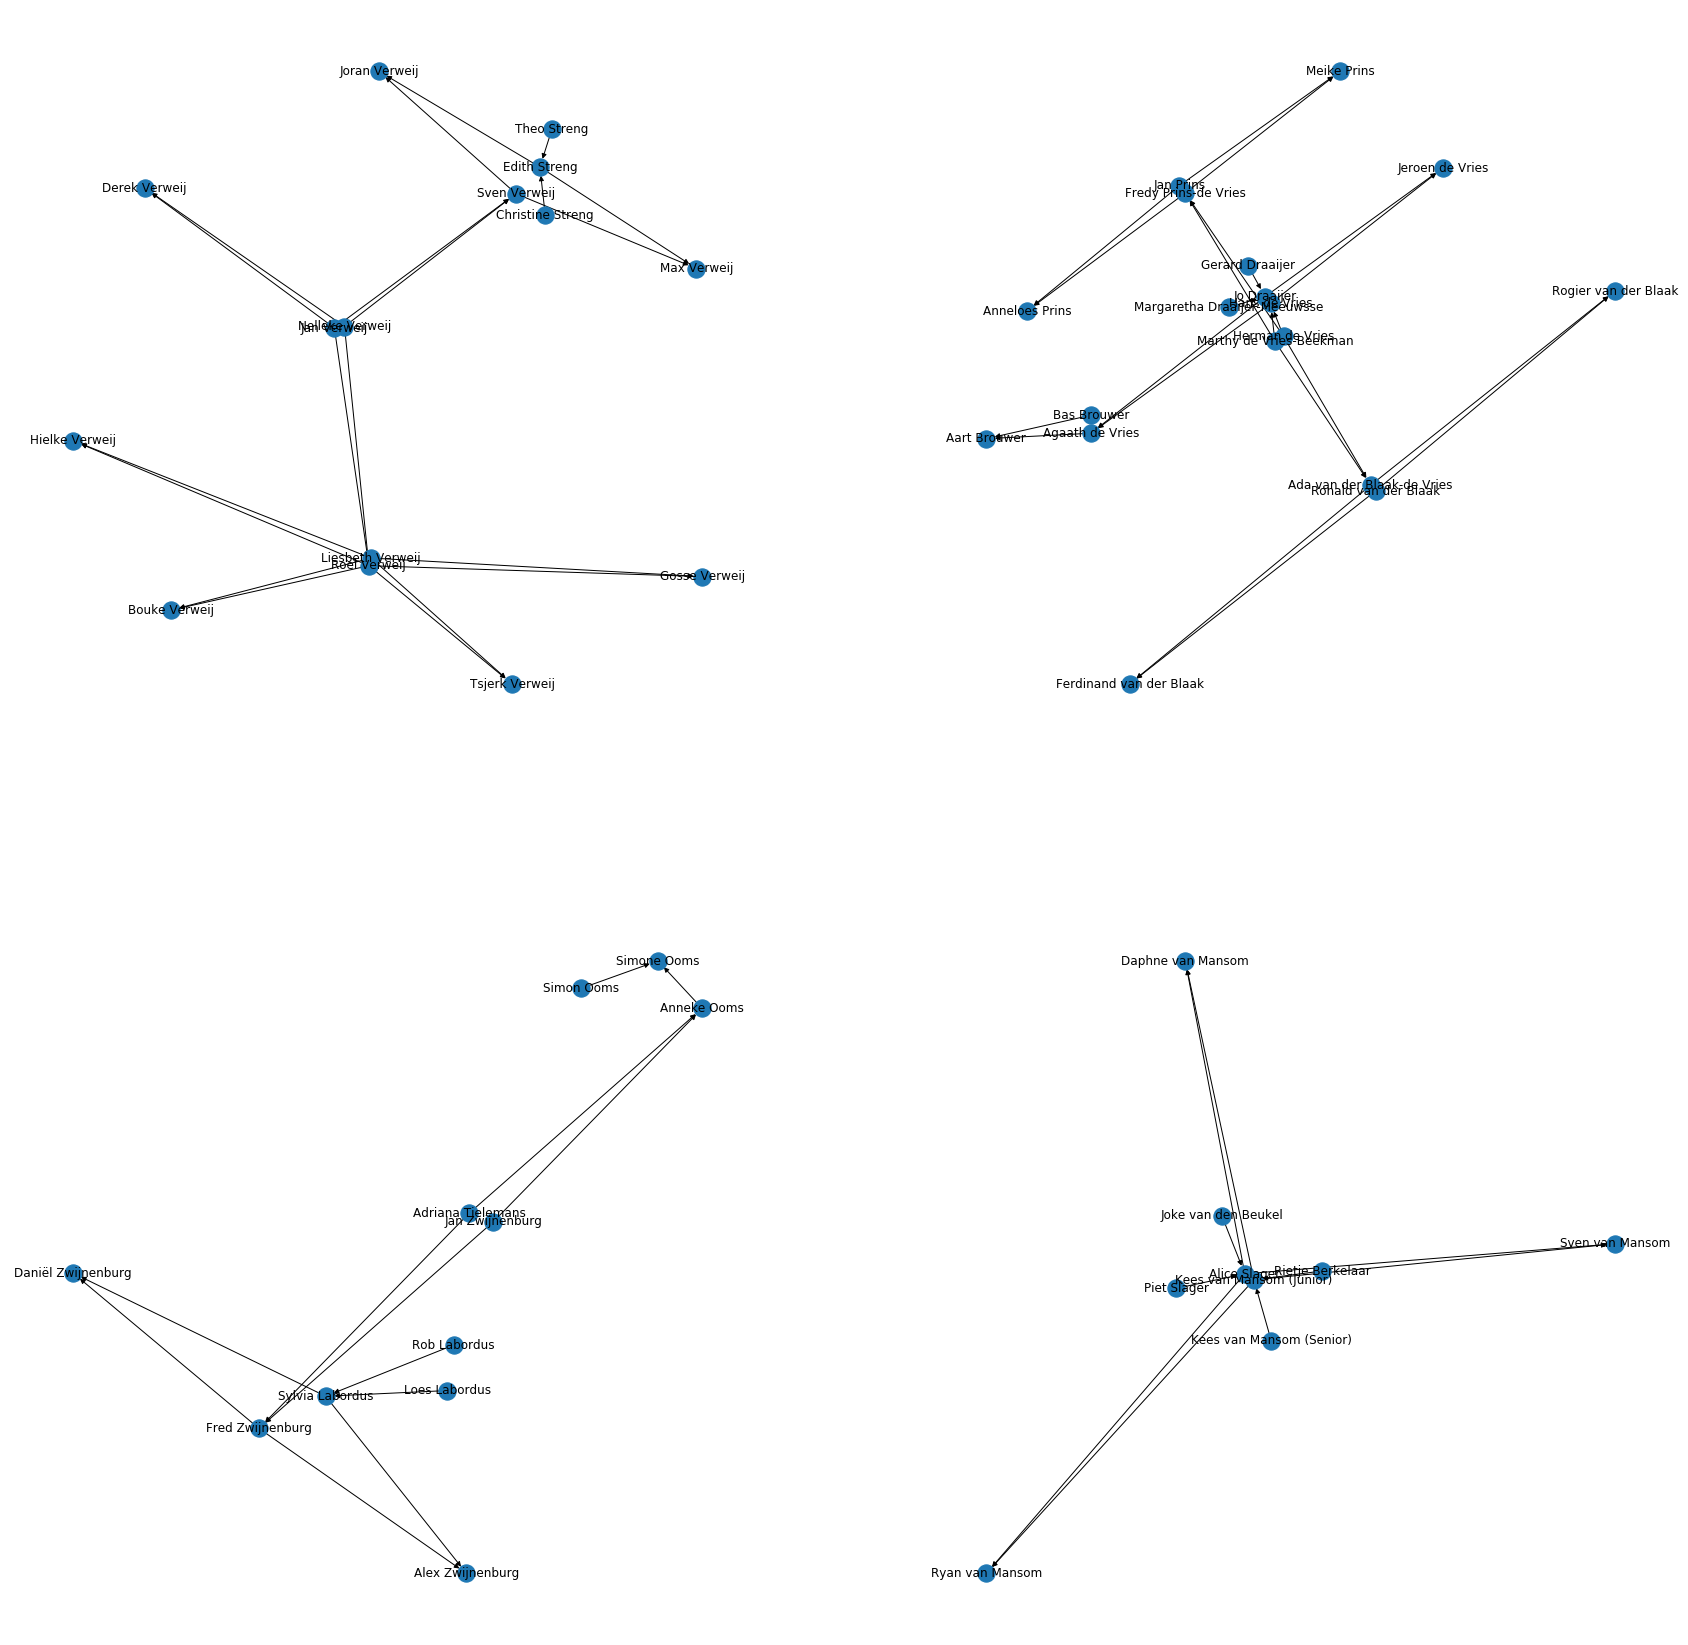

In [5]:
plt.figure(3,figsize=(12,12))


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,30))
ax = axes.flatten()

for i in range(4):
    sg = list(nx.weakly_connected_components(H))[i]
    sg = H.subgraph(sg)
    nx.draw_networkx(sg,  
                     ax=ax[i])
    ax[i].set_axis_off()

### Networkx Graph omzetten naar een rdflib Graph
We willen onze networkx Graph gaan omzetten zodat deze werkbaar is voor rdflib en we er queries op los kunnen gooien. om dit te doen maken we de functie `networkx2RDF(G)` die onze digraph omzet naar een rdf graph.

Om een networkx netwerk om te zetten naar een rdflib netwerk moeten we namespaces begrijpen en gebruiken. Een namespace kun je zien als een werkgebied waarbinnen verschillende objecten en predicaten staan waarmee rdflib kan werken. Laten we om te beginnen een eigen namespace aanmaken. Hiervoor hebben we de functie `Namespace()` geïmporteerd. We maken in dit geval de "website" http://team14w5.org/ aan, maar die website bestaat helemaal niet! Dit is enkel onze namespace.

In [6]:
n = Namespace('http://team14w5.org/')

Stel: we willen de resource "Toon" benoemen in onze namespace. Dan zijn er twee manieren om dit te doen. allereerst:

In [7]:
n.Toon

rdflib.term.URIRef('http://team14w5.org/Toon')

Dit werkt fantastisch! Alleen wordt het lastig wanneer we over een lijstje moeten gaan loopen, wat we natuurlijk moeten doen in ons networkx netwerk! Gelukkig is er nog een andere manier om Toon erbij te halen.

In [8]:
nodes = ['Toon','Alex','Jesse','Joran']
[n[node] for node in nodes]

[rdflib.term.URIRef('http://team14w5.org/Toon'),
 rdflib.term.URIRef('http://team14w5.org/Alex'),
 rdflib.term.URIRef('http://team14w5.org/Jesse'),
 rdflib.term.URIRef('http://team14w5.org/Joran')]

Nu komen we ergens! Laten we beginnen met onze functie.

In [9]:
def networkx2RDF(G):
    # We maken een nieuwe rdflib graph en een namespace
    g = Graph()
    n = Namespace('http://team14w5.org/')
    # Laten we eerst alle nodes als personen definiëren naar aanleiding van hun attributes
    nodes = [x for x in G.nodes(data=True)]
    for node in nodes:
        for attribute in node[1]:
            if node[1][attribute]:
                # Spaties werken niet in een linkje! Deze vervangen we door underscores
                # We gebruiken hier RDF. Dit is de namespace <http://www.w3.org/1999/02/22-rdf-syntax-ns#> die we geïmporteerd hebben
                g.add((n[node[0].replace(' ','_')], RDF.type, n[attribute.replace(' ','_')]))
                
    # Nu is het tijd om de relaties te definiëren
    edges = [x for x in G.edges(data=True)]
    for edge in edges:
        for attribute in edge[2]:
            if edge[2][attribute]:
                g.add((n[edge[0].replace(' ','_')], n[attribute.replace(' ','_')], n[edge[1].replace(' ','_')]))
    
    return g

En zo simpel is het! Elke node en relatie uit ons networkx netwerk wordt door deze functie verhuisd naar een rdflib Graph.
Eens zien wat deze functie doet met ons netwerk.

In [10]:
G = networkx2RDF(H)

triples= [triple for triple in G]
triples[:5], len(triples)

([(rdflib.term.URIRef('http://team14w5.org/Loes_Labordus'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.URIRef('http://team14w5.org/V')),
  (rdflib.term.URIRef('http://team14w5.org/Herman_de_Vries'),
   rdflib.term.URIRef('http://team14w5.org/ouder'),
   rdflib.term.URIRef('http://team14w5.org/Hans_de_Vries')),
  (rdflib.term.URIRef('http://team14w5.org/Bas_Brouwer'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.URIRef('http://team14w5.org/M')),
  (rdflib.term.URIRef('http://team14w5.org/Ryan_van_Mansom'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.URIRef('http://team14w5.org/M')),
  (rdflib.term.URIRef('http://team14w5.org/Jeroen_de_Vries'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.URIRef('http://team14w5.org/M'))],
 117)

Fantastisch! Alles staat erin! Maar we zijn natuurlijk nog niet klaar. We hebben ons netwerk verhuisd zodat we zoektermen op onze database los kunnen laten. Laten we dat eens gaan proberen.

### Queries runnen
Om een query te runnen op onze Graph gebruiken we de `query()` functie. Binnen deze functie gebruiken we de SPARQL taal. Laten we voor de vorm kijken of we alle ouders kunnen vinden.

In [11]:
qres = G.query(
    """
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a 
       WHERE {
          ?a t14:ouder ?b .
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Herman_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Ronald_van_der_Blaak')),
 (rdflib.term.URIRef('http://team14w5.org/Adriana_Tielemans')),
 (rdflib.term.URIRef('http://team14w5.org/Edith_Streng')),
 (rdflib.term.URIRef('http://team14w5.org/Gerard_Draaijer')),
 (rdflib.term.URIRef('http://team14w5.org/Rietje_Berkelaar')),
 (rdflib.term.URIRef('http://team14w5.org/Joke_van_den_Beukel')),
 (rdflib.term.URIRef('http://team14w5.org/Alice_Slager')),
 (rdflib.term.URIRef('http://team14w5.org/Kees_van_Mansom_(Senior)')),
 (rdflib.term.URIRef('http://team14w5.org/Nelleke_Verweij'))]

Dat is gelukt! 

Maar wat hebben we hier nu gedaan? om te beginnen hebben we aangegeven hoe onze namespace eruit ziet met `PREFIX t14: <http://team14w5.org/>`. Hierna pakten (`SELECT`) wij de unieke (`DISTINCT`) objecten ?a waarvoor geldt dat (`WHERE`) ?a een ouderrelatie heeft met een tweede object ?b. Onze ouderrelatie staat in de Graph als "http://team14w5.org/ouder". Dit geven wij aan door te beginnen met onze namespace, t14:, en hier ouder achter te zetten.

Laten we nu op basis van de ouder relatie andere familierelaties opzoeken.

#### Vader

Iemand is vader precies dan en slechts dan alleen als a een ouder is van b en a een man is.

In [12]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a 
       WHERE {
          ?a t14:ouder ?b .
          ?a rdf:type t14:M .
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Bas_Brouwer')),
 (rdflib.term.URIRef('http://team14w5.org/Jan_Prins')),
 (rdflib.term.URIRef('http://team14w5.org/Gerard_Draaijer')),
 (rdflib.term.URIRef('http://team14w5.org/Rob_Labordus')),
 (rdflib.term.URIRef('http://team14w5.org/Kees_van_Mansom_(Senior)')),
 (rdflib.term.URIRef('http://team14w5.org/Sven_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Kees_van_Mansom_(Junior)')),
 (rdflib.term.URIRef('http://team14w5.org/Fred_Zwijnenburg')),
 (rdflib.term.URIRef('http://team14w5.org/Piet_Slager')),
 (rdflib.term.URIRef('http://team14w5.org/Jan_Verweij'))]

Hier hadden we ineens twee voorwaardes! Na een voorwaarde zetten we een punt. Dan begrijpt SPARQL dat de voorwaarde voorbij is. We geen verder met de rest van de familie!

#### Moeder

Iemand is moeder precies dan en slechts dan alleen als a een ouder is van b en a een vrouw is.

In [13]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a 
       WHERE {
          ?a t14:ouder ?b .
          ?a rdf:type t14:V .
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Loes_Labordus')),
 (rdflib.term.URIRef('http://team14w5.org/Margaretha_Draaijer-Meeuwsse')),
 (rdflib.term.URIRef('http://team14w5.org/Rietje_Berkelaar')),
 (rdflib.term.URIRef('http://team14w5.org/Alice_Slager')),
 (rdflib.term.URIRef('http://team14w5.org/Adriana_Tielemans')),
 (rdflib.term.URIRef('http://team14w5.org/Liesbeth_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Jo_Draaijer')),
 (rdflib.term.URIRef('http://team14w5.org/Fredy_Prins-de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Ada_van_der_Blaak-de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Agaath_de_Vries'))]

Laten we het even omdraaien! We willen het kind hebben van de ouderrelatie.

#### Zoon

Iemand is zoon precies dan en slechts dan alleen als b ouder is van a en a een man is.

In [14]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a 
       WHERE {
          ?b t14:ouder ?a .
          ?a rdf:type t14:M .
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Ryan_van_Mansom')),
 (rdflib.term.URIRef('http://team14w5.org/Jeroen_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Bouke_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Derek_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Tsjerk_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Rogier_van_der_Blaak')),
 (rdflib.term.URIRef('http://team14w5.org/Alex_Zwijnenburg')),
 (rdflib.term.URIRef('http://team14w5.org/Sven_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Kees_van_Mansom_(Junior)')),
 (rdflib.term.URIRef('http://team14w5.org/Joran_Verweij'))]

We kunnen ?a dus zetten waar we willen! we hebben de variabele namelijk ook zelf deze naam gegeven.

#### Dochter

Iemand is dochter precies dan en slechts dan alleen als b ouder is van a en a een vrouw is.

In [15]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a 
       WHERE {
          ?b t14:ouder ?a .
          ?a rdf:type t14:V .
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Alice_Slager')),
 (rdflib.term.URIRef('http://team14w5.org/Jo_Draaijer')),
 (rdflib.term.URIRef('http://team14w5.org/Fredy_Prins-de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Daphne_van_Mansom')),
 (rdflib.term.URIRef('http://team14w5.org/Ada_van_der_Blaak-de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Agaath_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Anneloes_Prins')),
 (rdflib.term.URIRef('http://team14w5.org/Sylvia_Labordus')),
 (rdflib.term.URIRef('http://team14w5.org/Meike_Prins')),
 (rdflib.term.URIRef('http://team14w5.org/Simone_Ooms'))]

Laten we het iets ingewikkelder maken! We halen er een derde persoon bij!

#### Broer

Iemand is broer precies dan en slechts dan alleen als c een ouder is van a, c een ouder is van b en a een man is.

In [16]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a
       WHERE {
          ?c t14:ouder ?a .
          ?c t14:ouder ?b .
          ?a rdf:type t14:M .
          FILTER(?a != ?b)
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Ryan_van_Mansom')),
 (rdflib.term.URIRef('http://team14w5.org/Jeroen_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Bouke_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Derek_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Tsjerk_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Rogier_van_der_Blaak')),
 (rdflib.term.URIRef('http://team14w5.org/Alex_Zwijnenburg')),
 (rdflib.term.URIRef('http://team14w5.org/Sven_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Joran_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Fred_Zwijnenburg'))]

Dat zijn alle broers! Maar wat is dat `FILTER(?a != ?b)` nou? Dat is om te controleren dat a en b niet hetzelfde zijn! Je kunt natuurlijk niet je eigen broer zijn! Misschien is het leuk om bij de zussen even te kijken van wie ze nou zus zijn.

#### Zus

Iemand is zus precies dan en slechts dan alleen als c een ouder is van a, c een ouder is van b en a een vrouw is.

In [17]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a ?b
       WHERE {
          ?c t14:ouder ?a .
          ?c t14:ouder ?b .
          ?a rdf:type t14:V .
          FILTER(?a != ?b)
       }""")

list(qres)[-5:]

[(rdflib.term.URIRef('http://team14w5.org/Ada_van_der_Blaak-de_Vries'),
  rdflib.term.URIRef('http://team14w5.org/Hans_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Agaath_de_Vries'),
  rdflib.term.URIRef('http://team14w5.org/Jeroen_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Anneloes_Prins'),
  rdflib.term.URIRef('http://team14w5.org/Meike_Prins')),
 (rdflib.term.URIRef('http://team14w5.org/Meike_Prins'),
  rdflib.term.URIRef('http://team14w5.org/Anneloes_Prins')),
 (rdflib.term.URIRef('http://team14w5.org/Anneke_Ooms'),
  rdflib.term.URIRef('http://team14w5.org/Fred_Zwijnenburg'))]

We gaan weer even door met onze familie.

#### Opa

Iemand is opa precies dan en slechts dan alleen als a ouder is van b, b ouder is van c en a een man is.

In [18]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a 
       WHERE {
          ?a t14:ouder ?b .
          ?b t14:ouder ?c .
          ?a rdf:type t14:M .
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Gerard_Draaijer')),
 (rdflib.term.URIRef('http://team14w5.org/Rob_Labordus')),
 (rdflib.term.URIRef('http://team14w5.org/Kees_van_Mansom_(Senior)')),
 (rdflib.term.URIRef('http://team14w5.org/Piet_Slager')),
 (rdflib.term.URIRef('http://team14w5.org/Jan_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Hans_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Theo_Streng')),
 (rdflib.term.URIRef('http://team14w5.org/Jan_Zwijnenburg')),
 (rdflib.term.URIRef('http://team14w5.org/Herman_de_Vries'))]

#### Oma

Iemand is oma precies dan en slechts dan alleen als a ouder is van b, b ouder is van c en a een vrouw is.

In [19]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a 
       WHERE {
          ?a t14:ouder ?b .
          ?b t14:ouder ?c .
          ?a rdf:type t14:V .
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Loes_Labordus')),
 (rdflib.term.URIRef('http://team14w5.org/Margaretha_Draaijer-Meeuwsse')),
 (rdflib.term.URIRef('http://team14w5.org/Rietje_Berkelaar')),
 (rdflib.term.URIRef('http://team14w5.org/Adriana_Tielemans')),
 (rdflib.term.URIRef('http://team14w5.org/Jo_Draaijer')),
 (rdflib.term.URIRef('http://team14w5.org/Joke_van_den_Beukel')),
 (rdflib.term.URIRef('http://team14w5.org/Marthy_de_Vries-Beekman')),
 (rdflib.term.URIRef('http://team14w5.org/Christine_Streng')),
 (rdflib.term.URIRef('http://team14w5.org/Nelleke_Verweij'))]

Ook dat kunnen we weer omkeren!

#### Kleinzoon

Iemand is kleinzoon precies dan en slechts dan alleen als c ouder is van b, b ouder is van a en a een man is.

In [20]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a 
       WHERE {
          ?c t14:ouder ?b .
          ?b t14:ouder ?a .
          ?a rdf:type t14:M .
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Ryan_van_Mansom')),
 (rdflib.term.URIRef('http://team14w5.org/Jeroen_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Bouke_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Tsjerk_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Rogier_van_der_Blaak')),
 (rdflib.term.URIRef('http://team14w5.org/Alex_Zwijnenburg')),
 (rdflib.term.URIRef('http://team14w5.org/Joran_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Sven_van_Mansom')),
 (rdflib.term.URIRef('http://team14w5.org/Gosse_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Ferdinand_van_der_Blaak'))]

#### Kleindochter

Iemand is kleindochter precies dan en slechts dan alleen als c ouder is van b, b ouder is van a en a een vrouw is.

In [21]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a 
       WHERE {
          ?c t14:ouder ?b .
          ?b t14:ouder ?a .
          ?a rdf:type t14:V .
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Daphne_van_Mansom')),
 (rdflib.term.URIRef('http://team14w5.org/Agaath_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Anneloes_Prins')),
 (rdflib.term.URIRef('http://team14w5.org/Meike_Prins')),
 (rdflib.term.URIRef('http://team14w5.org/Simone_Ooms'))]

We voegen nog een stapje extra toe! Een vierde persoon erbij! Hier kijken we gelijk even naar een andere manier waarop we `FILTER` kunnen gebruiken.

#### Oom

Iemand is oom precies dan en slechts dan alleen als a een broer is van b en b ouder is van d.

In [22]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a 
       WHERE {
          ?c t14:ouder ?a .
          ?c t14:ouder ?b .
          ?a rdf:type t14:M .
          ?b t14:ouder ?d .
          FILTER NOT EXISTS {
          ?a t14:ouder ?d
          }
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Jeroen_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Derek_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Sven_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Fred_Zwijnenburg')),
 (rdflib.term.URIRef('http://team14w5.org/Roel_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Hans_de_Vries'))]

Bij dit `FILTER` controleren we of er geen (`NOT EXISTS`) ouderrelatie bestaat tussen a en d. Als je iemands oom bent, ben je natuurlijk niet ook ouder van diegene.

#### Tante

Iemand is tante precies dan en slechts dan alleen als a een zus is van b en b ouder is van d.

In [23]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a
       WHERE {
          ?c t14:ouder ?a .
          ?c t14:ouder ?b .
          ?a rdf:type t14:V .
          ?b t14:ouder ?d .
          FILTER NOT EXISTS {
          ?a t14:ouder ?d
          }
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Fredy_Prins-de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Ada_van_der_Blaak-de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Anneke_Ooms'))]

Laten we het deze keer iets makkelijker omkeren. We pakken gewoon ?d! We moeten er nu wel op letten dat we de ?a in `?d rdf:type t14:M` even in ?d veranderen.

#### Neef

Iemand is neef precies dan en slechts dan alleen als a oom of tante is van d en d een man is.

In [24]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?d 
       WHERE {
          ?c t14:ouder ?a .
          ?c t14:ouder ?b .
          ?d rdf:type t14:M .
          ?b t14:ouder ?d .
          FILTER NOT EXISTS {
          ?a t14:ouder ?d
          }
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Jeroen_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Bouke_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Tsjerk_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Rogier_van_der_Blaak')),
 (rdflib.term.URIRef('http://team14w5.org/Alex_Zwijnenburg')),
 (rdflib.term.URIRef('http://team14w5.org/Joran_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Gosse_Verweij')),
 (rdflib.term.URIRef('http://team14w5.org/Ferdinand_van_der_Blaak')),
 (rdflib.term.URIRef('http://team14w5.org/Aart_Brouwer')),
 (rdflib.term.URIRef('http://team14w5.org/Hielke_Verweij'))]

#### Nicht

Iemand is nicht precies dan en slechts dan alleen als a oom of tante is van d en d een vrouw is.

In [25]:
qres = G.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?d 
       WHERE {
          ?c t14:ouder ?a .
          ?c t14:ouder ?b .
          ?d rdf:type t14:V .
          ?b t14:ouder ?d .
          FILTER NOT EXISTS {
          ?a t14:ouder ?d
          }
       }""")

list(qres)[:10]

[(rdflib.term.URIRef('http://team14w5.org/Agaath_de_Vries')),
 (rdflib.term.URIRef('http://team14w5.org/Anneloes_Prins')),
 (rdflib.term.URIRef('http://team14w5.org/Meike_Prins')),
 (rdflib.term.URIRef('http://team14w5.org/Simone_Ooms'))]

### Ander netwerk

We kunnen alle familierelaties dus redelijk makkelijk vinden via SPARQL wanneer we maar één beginrelatie hebben! Laten we iets soortgelijks proberen met een ander netwerk.

In [26]:
F = nx.DiGraph()

# Functies definieren
def R(x,y,network = F):
    network.add_edge(x,y, houdt_van = True)
    
def CisM(x,network = F):
    try:
        if network.nodes[x]['M'] == True:
            try:
                if network.nodes[x]['IM'] == True:
                    network.add_node(x, CisM=True)
            except:
                network.add_node(x, CisM=False)
    except:
        network.add_node(x, CisM=False)
    
def CisV(x,network = F):
    try:
        if network.nodes[x]['V'] == True:
            try:
                if network.nodes[x]['IV'] == True:
                    network.add_node(x, CisV=True)
            except:
                network.add_node(x, CisV=False)
    except:
        network.add_node(x, CisV=False)
        
# Primitieven definieren
MannelijkeGeslachtsdelen = {'Alex Allebijnenburg','Johanna Verweijfd','Mooie knul','Minder mooie knul','Quintin Ueer'}
VrouwelijkeGeslachtsdelen = {"Agaath de 'Bisch",'Marie-Louise'}
IdentificeertMan = {'Alex Allebijnenburg','Mooie knul','Minder mooie knul'}
IdentificeertVrouw = {'Johanna Verweijfd','Sven van Interom',"Agaath de 'Bisch",'Marie-Louise'}

F.add_nodes_from(MannelijkeGeslachtsdelen, M=True)
F.add_nodes_from(VrouwelijkeGeslachtsdelen, V=True)
F.add_nodes_from(IdentificeertMan, IM=True)
F.add_nodes_from(IdentificeertVrouw, IV=True)

R('Alex Allebijnenburg','Marie-Louise')
R('Marie-Louise','Alex Allebijnenburg')
R('Alex Allebijnenburg','Mooie knul')

R('Minder mooie knul', 'Mooie knul')

R("Agaath de 'Bisch",'Marie-Louise')

Hoe ziet dit netwerk eruit?

C:\Users\Joran\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Joran\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


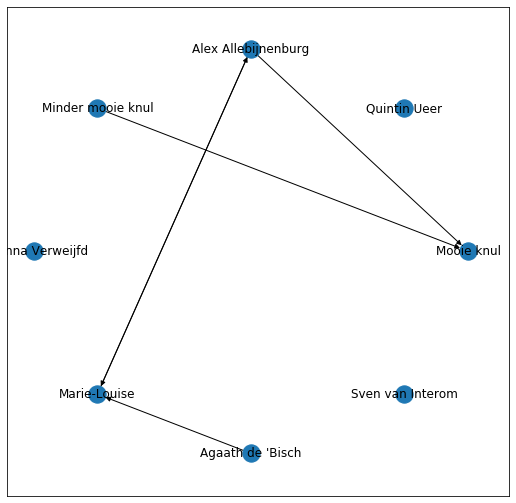

In [27]:
plt.figure(3,figsize=(9,9))

nx.draw_networkx(F, pos = nx.circular_layout(F))

Dit netwerk is gemaakt om LHBTQI+ te definiëren. Laten we kijken of we al deze letters kunnen vinden! Eerst zetten we dit netwerk natuurlijk weer om naar een rdflib Graph.

In [28]:
E = networkx2RDF(F)

triples= [triple for triple in E]
triples[:5], len(triples)

([(rdflib.term.URIRef('http://team14w5.org/Alex_Allebijnenburg'),
   rdflib.term.URIRef('http://team14w5.org/houdt_van'),
   rdflib.term.URIRef('http://team14w5.org/Mooie_knul')),
  (rdflib.term.URIRef('http://team14w5.org/Alex_Allebijnenburg'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.URIRef('http://team14w5.org/M')),
  (rdflib.term.URIRef('http://team14w5.org/Marie-Louise'),
   rdflib.term.URIRef('http://team14w5.org/houdt_van'),
   rdflib.term.URIRef('http://team14w5.org/Alex_Allebijnenburg')),
  (rdflib.term.URIRef("http://team14w5.org/Agaath_de_'Bisch"),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.URIRef('http://team14w5.org/IV')),
  (rdflib.term.URIRef("http://team14w5.org/Agaath_de_'Bisch"),
   rdflib.term.URIRef('http://team14w5.org/houdt_van'),
   rdflib.term.URIRef('http://team14w5.org/Marie-Louise'))],
 19)

Tijd om de letters te vinden!

#### L

Iemand is lesbisch precies dan en alleen dan als deze persoon een cis vrouw is en alleen van cis vrouwen houdt.

In [29]:
qres = E.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a
       WHERE {
          {
          ?a t14:houdt_van ?b .
          ?a rdf:type t14:V .
          ?b rdf:type t14:V .
          ?a rdf:type t14:IV .
          ?b rdf:type t14:IV .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:IM .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:M .
          }
       }""")

list(qres)

[(rdflib.term.URIRef("http://team14w5.org/Agaath_de_'Bisch"))]

Wat gebeurt hier? In onze `WHERE` Zoeken we eerst op alle triples waar ?a een vrouw is, zich identificeert als vrouw en van iemand houdt die een vrouw is en zich identificeert als vrouw. Is dat dan niet genoeg? Nee! In onze beschrijving staat namelijk dat ?a alleen maar van cis vrouwen mag houden. We moeten dus alle paartjes weghalen waar ?a houdt van iemand die geen cis vrouw is. Hiervoor gebruiken we `MINUS`.

#### H

Iemand is homo precies dan en alleen dan als deze persoon een cis man is en alleen van cis mannen houdt.

In [30]:
qres = E.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a
       WHERE {
          {
          ?a t14:houdt_van ?b .
          ?a rdf:type t14:M .
          ?b rdf:type t14:M .
          ?a rdf:type t14:IM .
          ?b rdf:type t14:IM .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:IV .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:V .
          }
       }""")

list(qres)

[(rdflib.term.URIRef('http://team14w5.org/Minder_mooie_knul'))]

#### B

Iemand is biseksueel precies dan en alleen dan als deze persoon alleen van cis mannen of cis vrouwen houdt.

In [31]:
qres = E.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a
       WHERE {
          ?a t14:houdt_van ?b .
          ?a t14:houdt_van ?c .
          ?b rdf:type t14:M .
          ?b rdf:type t14:IM .
          ?c rdf:type t14:V .
          ?c rdf:type t14:IV .
       }
       """)

list(qres)

[(rdflib.term.URIRef('http://team14w5.org/Alex_Allebijnenburg'))]

#### T

Iemand is transgender precies dan en alleen dan als deze persoon mannelijke geslachtsdelen, maar zich identificeert als vrouw of als deze persoon vrouwelijke geslachtsdelen bezit, maar zich identificeert als man.

In [32]:
qres = E.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a
       WHERE {
          {
          ?a rdf:type t14:M .
          ?a rdf:type t14:IV .
          }
          UNION
          {
          ?a rdf:type t14:V .
          ?a rdf:type t14:IM .
          }
       }
       """)

list(qres)

[(rdflib.term.URIRef('http://team14w5.org/Johanna_Verweijfd'))]

Hey! Hier gebeurt weer iets! Er zijn twee verschillende groepen die behoren tot de letter T. De groep die mannelijke geslachtsdelen heeft, maar zich identificeert als vrouw en de groep waarbij dit precies andersom is. In dit geval maken we voor beide groepen een aparte query en voegen we ze samen met `UNION`.

#### Q

Iemand is questioning precies dan en alleen dan als deze persoon zich niet identificeert als man of vrouw.

In [33]:
qres = E.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a
       WHERE {
       {
       ?a ?b ?c .
       }
       MINUS{
       ?a rdf:type t14:IM .
       }
       MINUS{
       ?a rdf:type t14:IV .
       }
       }
       """)

list(qres)

[(rdflib.term.URIRef('http://team14w5.org/Quintin_Ueer'))]

Iedereen in ons netwerk heeft een triple. We nemen dus alle triples en halen hier degene vanaf die type IM of IV hebben.

#### I

Iemand is interseksueel precies dan en alleen dan als deze persoon geen mannelijke geslachtsdelen en geen vrouwelijke geslachtsdelen bezit of als deze persoon mannelijke geslachtsdelen en vrouwelijke geslachtsdelen bezit.

In [34]:
qres = E.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a
       WHERE {
       {{
       ?a rdf:type ?c .
       }
       MINUS{
       ?a rdf:type t14:M .
       }
       MINUS{
       ?a rdf:type t14:V .
       }}
       UNION{
       ?a rdf:type t14:M .
       ?a rdf:type t14:V .
       }
       }
       """)

list(qres)

[(rdflib.term.URIRef('http://team14w5.org/Sven_van_Interom'))]

Dat was ook weer een flinke! We pakten eerst alle type paartjes, haalde de M en V types er toen af en voegden objecten met beide M en V er toen weer bij!

#### +

Iemand is + precies dan en alleen dan als Deze persoon niet behoort tot een van de groepen in het LHBTQI spectrum en geen hetero is.

Dit wordt er pas echt een! Hier komen al onze queries in terug!

In [35]:
qres = E.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX t14: <http://team14w5.org/>
    
    SELECT DISTINCT ?a
       WHERE {
       
       {
       SELECT DISTINCT ?a
       WHERE {
           ?a ?b ?c .
           }
       }
       
       MINUS{
       {
          ?a t14:houdt_van ?b .
          ?a rdf:type t14:V .
          ?b rdf:type t14:V .
          ?a rdf:type t14:IV .
          ?b rdf:type t14:IV .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:IM .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:M .
          }
       }
       
       MINUS{
       {
          ?a t14:houdt_van ?b .
          ?a rdf:type t14:M .
          ?b rdf:type t14:M .
          ?a rdf:type t14:IM .
          ?b rdf:type t14:IM .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:IV .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:V .
          }
       }
       
       MINUS{
          ?a t14:houdt_van ?b .
          ?a t14:houdt_van ?c .
          ?b rdf:type t14:M .
          ?b rdf:type t14:IM .
          ?c rdf:type t14:V .
          ?c rdf:type t14:IV .
       }
       
       MINUS{
       {
          ?a rdf:type t14:M .
          ?a rdf:type t14:IV .
          }
          UNION
          {
          ?a rdf:type t14:V .
          ?a rdf:type t14:IM .
          }
       }
       
       MINUS{
       {
       ?a ?b ?c .
       }
       MINUS{
       ?a rdf:type t14:IM .
       }
       MINUS{
       ?a rdf:type t14:IV .
       }
       }
       
       MINUS{
       {{
       ?a rdf:type ?c .
       }
       MINUS{
       ?a rdf:type t14:M .
       }
       MINUS{
       ?a rdf:type t14:V .
       }}
       UNION{
       ?a rdf:type t14:M .
       ?a rdf:type t14:V .
       }
       }
       
       MINUS{
       {
          ?a t14:houdt_van ?b .
          ?a rdf:type t14:M .
          ?b rdf:type t14:V .
          ?a rdf:type t14:IM .
          ?b rdf:type t14:IV .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:IM .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:M .
          }
       }
       
       MINUS{
       {
          ?a t14:houdt_van ?b .
          ?a rdf:type t14:V .
          ?b rdf:type t14:M .
          ?a rdf:type t14:IV .
          ?b rdf:type t14:IM .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:IV .
          }
          MINUS{
          ?a t14:houdt_van ?c .
          ?c rdf:type t14:V .
          }
       }
       
       }
       """)

list(qres)

[(rdflib.term.URIRef('http://team14w5.org/Mooie_knul'))]

We hebben hier in het begin van onze query `SELECT DISTINCT ?a WHERE{?a ?b ?c .}` staan. Dit haalt alle unieke objecten die we hebben uit het netwerk, waarna we kunnen kijken of deze onder een van de eerder beschreven categorieën vallen. Een van de categorieën was nog niet eerder beschreven, de laatste. Kun je uitvogelen wat deze inhoudt?

Zo zie je maar weer dat er met elk netwerk te werken valt, zolang je maar weet hoe het in elkaar zit! Misschien is het interessant om er een netwerk bij te halen wat niet van ons is.

### Externe data parsen

Allereerst importeren wij een functie die het mogelijk om een extern bestand rdf bestand te vormen in een network x graph.

In [36]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph as rdf2nx

We gaan de DBpedia pagina van Ridouan Taghi bekijken en deze omzetten naar een NetworkX graph. Om dit te doen maken we alleereerst natuurlijk een RDFLib graph aan, en parsen we de informatie van DBpedia met `r.parse('http://dbpedia.org/resource/Ridouan_Taghi')`. Omdat we de functie net hebben geïmporteerd als `rdf2nx` kunnen we simpelweg `rdf2nx(r)` gebruiken, en dit de naam `T` geven. 

(networkx.classes.digraph.DiGraph,
 [rdflib.term.URIRef('http://dbpedia.org/resource/Ridouan_Taghi'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Nieuw_Vosseveld'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Vught'),
  rdflib.term.URIRef('http://dbpedia.org/resource/List_of_criminal_enterprises,_gangs,_and_syndicates')])

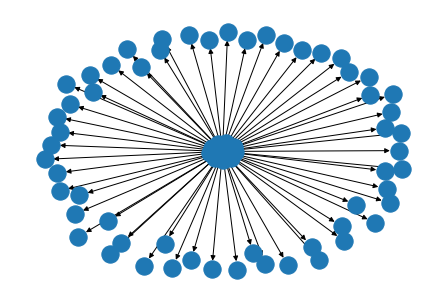

In [42]:
# Graaf maken
r = rdflib.Graph()

# download de RDF file van Ridouan Taghi
r.parse('http://dbpedia.org/resource/Ridouan_Taghi')

T = rdf2nx(r)
nx.draw(T)
type(T), list(T)[:4]

Om te kijken of het gelukt is, zullen we wat basis netwerkmaten laten zien.

In [38]:
print('Aantal nodes: ', len(T.nodes))
print('Aantal edges: ', len(T.edges))

centralitydict = nx.degree_centrality(T)
HighestValue = max(centralitydict, key=centralitydict.get) 
print('De meest centrale node is:', HighestValue, 'Met een degree centrality van:', centralitydict[HighestValue]) 
print('Gemiddelde lengte van de korste paden tussen nodes:', nx.average_shortest_path_length(T))

Aantal nodes:  67
Aantal edges:  73
De meest centrale node is: http://dbpedia.org/resource/Ridouan_Taghi Met een degree centrality van: 1.1212121212121213
Gemiddelde lengte van de korste paden tussen nodes: 0.2700135685210312
